In [1]:
import pandas as pd

# Load the uploaded Excel file
file_path = 'MaliciousPackageMetadata.xlsx'
df = pd.read_excel(file_path)

# Display basic information about the dataset
df_info = df.info()

# Display summary statistics of the dataset
df_summary = df.describe()

# Check the first few rows to understand the structure
df_head = df.head()

df_info, df_summary, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7127 entries, 0 to 7126
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Path                      7127 non-null   object 
 1   Name                      7127 non-null   object 
 2   Version                   7127 non-null   object 
 3   PKG-INFO                  6606 non-null   object 
 4   Metadata-Version          6546 non-null   float64
 5   Summary                   6385 non-null   object 
 6   Author                    6139 non-null   object 
 7   Author-email              5708 non-null   object 
 8   License                   3416 non-null   object 
 9   Home-page                 3308 non-null   object 
 10  Keywords                  670 non-null    object 
 11  Description               2349 non-null   object 
 12  Platform                  2885 non-null   object 
 13  Classifier                4537 non-null   object 
 14  Document

(None,
        Metadata-Version  tag_build  tag_date  dependency links
 count       6546.000000       19.0    5478.0               0.0
 mean           1.862282        0.0       0.0               NaN
 std            0.448547        0.0       0.0               NaN
 min            1.000000        0.0       0.0               NaN
 25%            2.100000        0.0       0.0               NaN
 50%            2.100000        0.0       0.0               NaN
 75%            2.100000        0.0       0.0               NaN
 max            2.100000        0.0       0.0               NaN,
                                                 Path      Name  Version  \
 0  pypi_malregistry-main/10Cent10/999.0.4/10Cent1...  10Cent10  999.0.4   
 1  pypi_malregistry-main/10Cent11/999.0.4/10Cent1...  10Cent11  999.0.4   
 2  pypi_malregistry-main/11cent/999.0.0/11Cent-99...    11Cent  999.0.0   
 3  pypi_malregistry-main/11cent/999.0.1/11Cent-99...    11Cent  999.0.1   
 4  pypi_malregistry-main/11cent/999

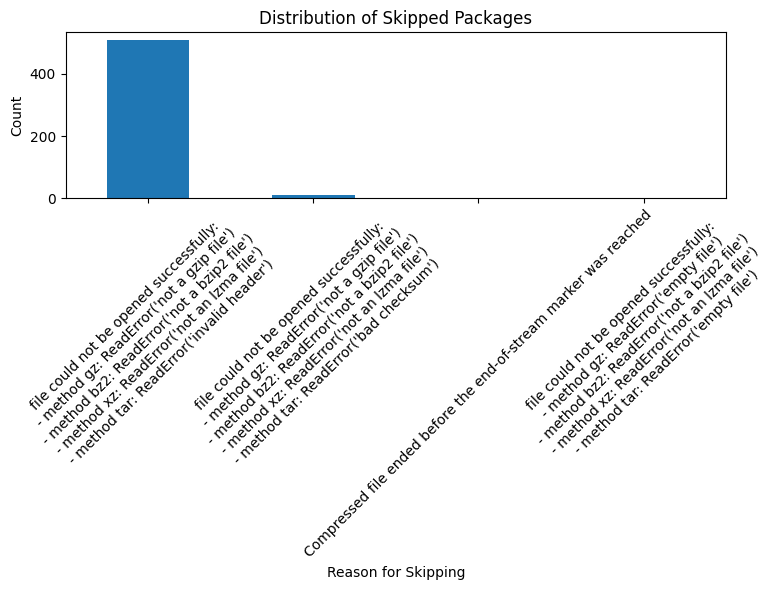

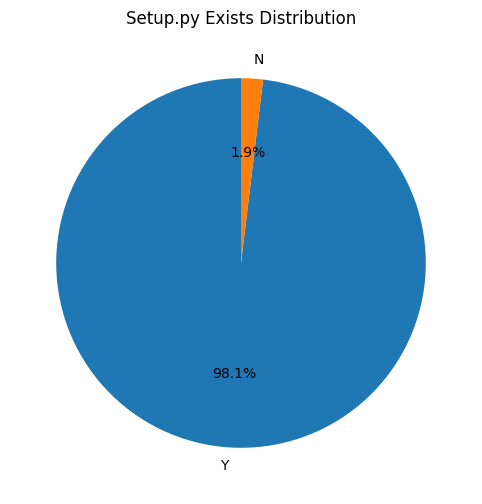

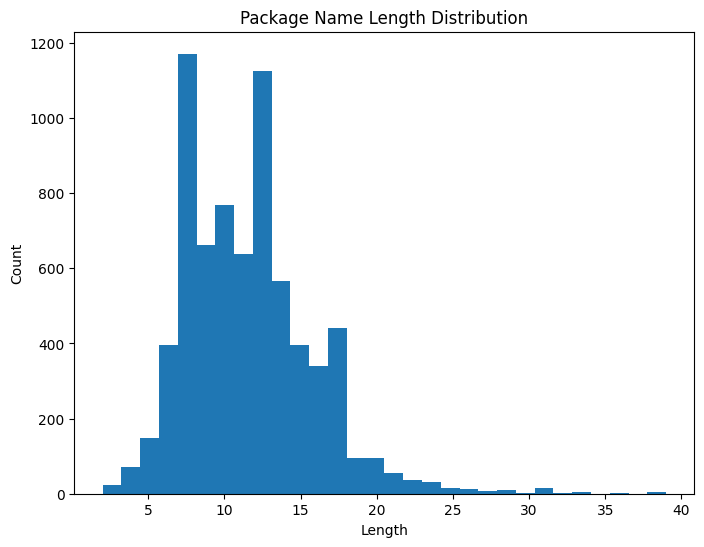

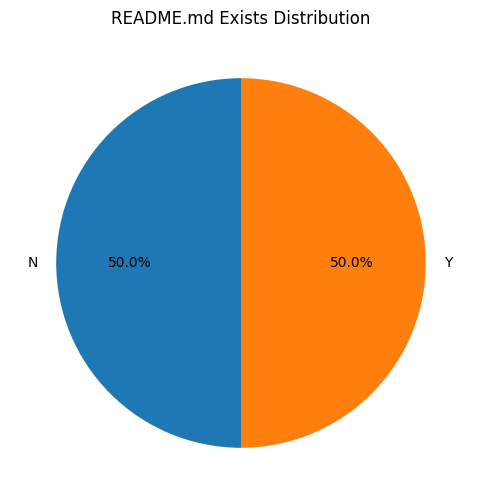

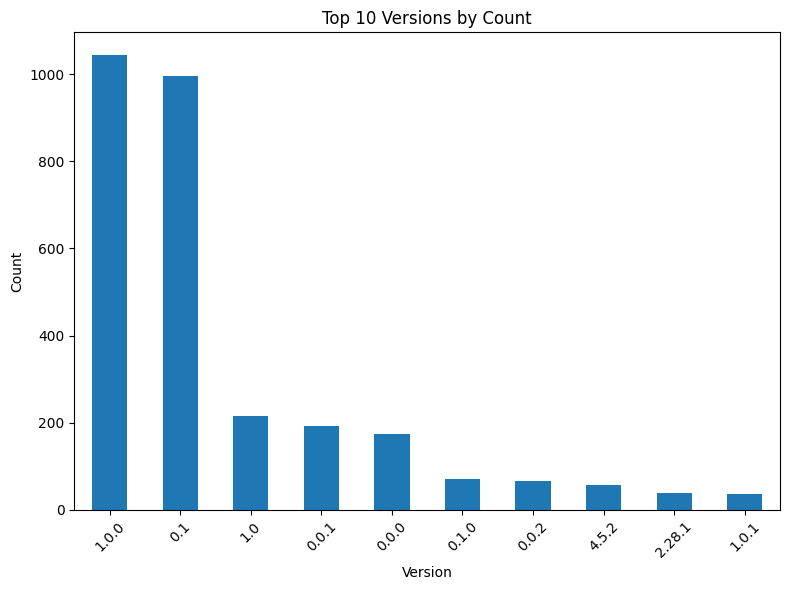

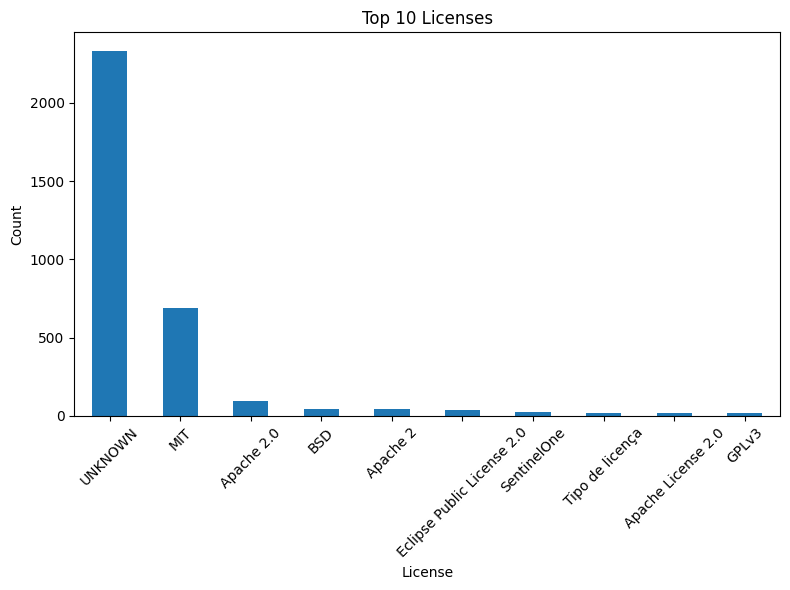

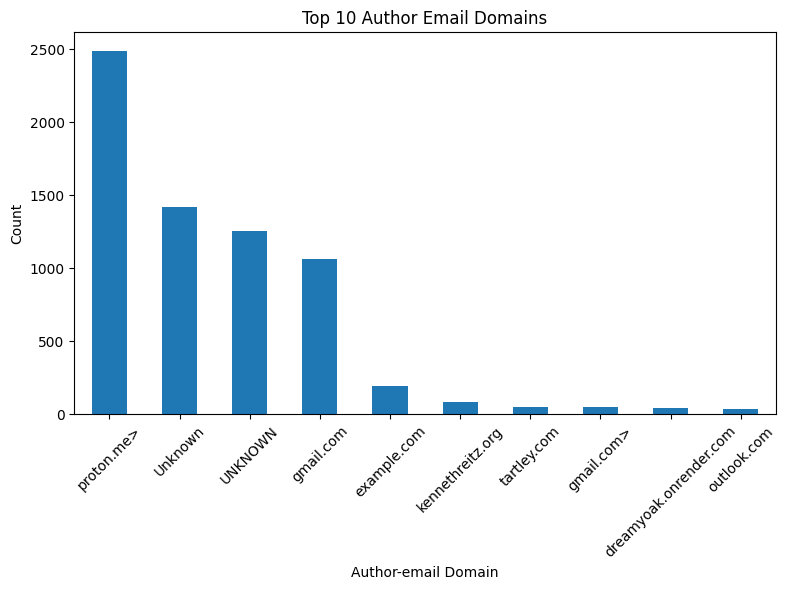

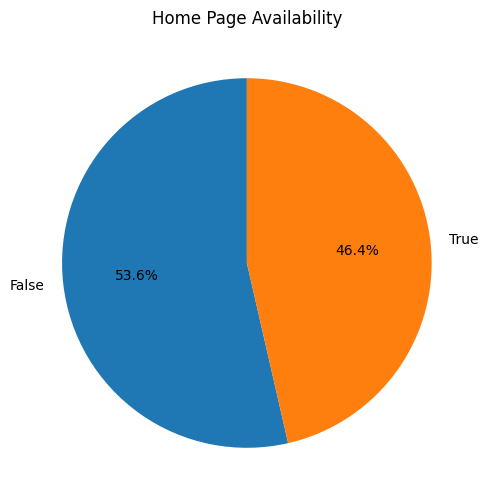

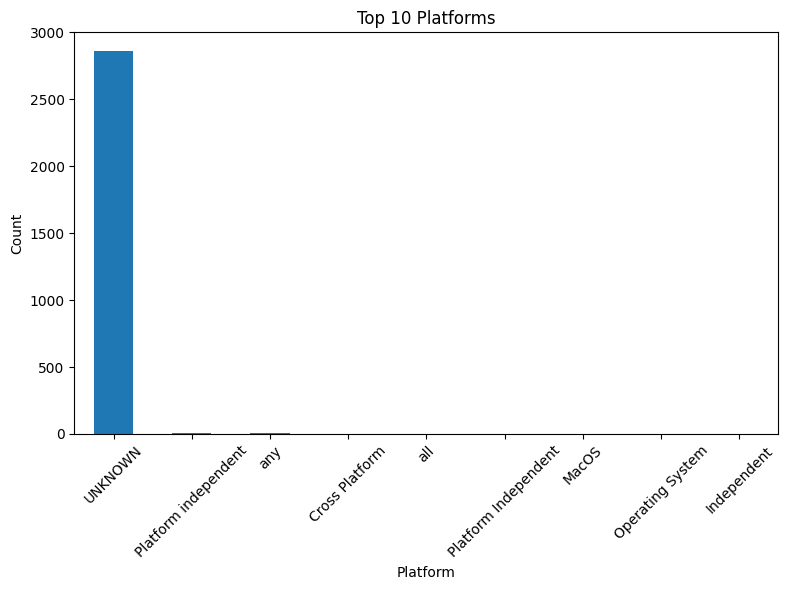

In [3]:
# Re-generate the remaining figures without word cloud

# 1. Figure: Distribution of Skipped Packages
skip_reason_counts = df['Reason for Skipping'].value_counts()

# 2. Figure: Distribution of Setup.py Exists
setup_py_exists_counts = df['Setup.py Exists'].value_counts()

# 3. Figure: Package Name Length Distribution
df['Name Length'] = df['Name'].str.len()

# 4. Figure: Distribution of README.md Exists
readme_md_exists_counts = df['README.md Exists'].value_counts()

# 5. Figure: Version Count Distribution
version_counts = df['Version'].value_counts()

# 6. Figure: License Distribution
license_counts = df['License'].value_counts()

# 7. Figure: Author Email Domain Distribution (Extract domain from email)
df['Author-email Domain'] = df['Author-email'].apply(lambda x: x.split('@')[-1] if pd.notnull(x) else 'Unknown')
author_email_domain_counts = df['Author-email Domain'].value_counts()

# 8. Figure: Home Page Availability
home_page_exists_counts = df['Home-page'].notnull().value_counts()

# 9. Figure: Top 10 Platforms
platform_counts = df['Platform'].value_counts().head(10)

# Generate plots

# Plot 1: Skipped Packages Distribution
plt.figure(figsize=(8, 6))
skip_reason_counts.plot(kind='bar')
plt.title('Distribution of Skipped Packages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Setup.py Exists Distribution
plt.figure(figsize=(8, 6))
setup_py_exists_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Setup.py Exists Distribution')
plt.ylabel('')
plt.show()

# Plot 3: Package Name Length Distribution
plt.figure(figsize=(8, 6))
df['Name Length'].plot(kind='hist', bins=30)
plt.title('Package Name Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

# Plot 4: README.md Exists Distribution
plt.figure(figsize=(8, 6))
readme_md_exists_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('README.md Exists Distribution')
plt.ylabel('')
plt.show()

# Plot 5: Version Count Distribution
plt.figure(figsize=(8, 6))
version_counts.head(10).plot(kind='bar')
plt.title('Top 10 Versions by Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 6: License Distribution
plt.figure(figsize=(8, 6))
license_counts.head(10).plot(kind='bar')
plt.title('Top 10 Licenses')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 7: Author Email Domain Distribution
plt.figure(figsize=(8, 6))
author_email_domain_counts.head(10).plot(kind='bar')
plt.title('Top 10 Author Email Domains')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 8: Home Page Availability
plt.figure(figsize=(8, 6))
home_page_exists_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Home Page Availability')
plt.ylabel('')
plt.show()

# Plot 9: Top 10 Platforms
plt.figure(figsize=(8, 6))
platform_counts.plot(kind='bar')
plt.title('Top 10 Platforms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

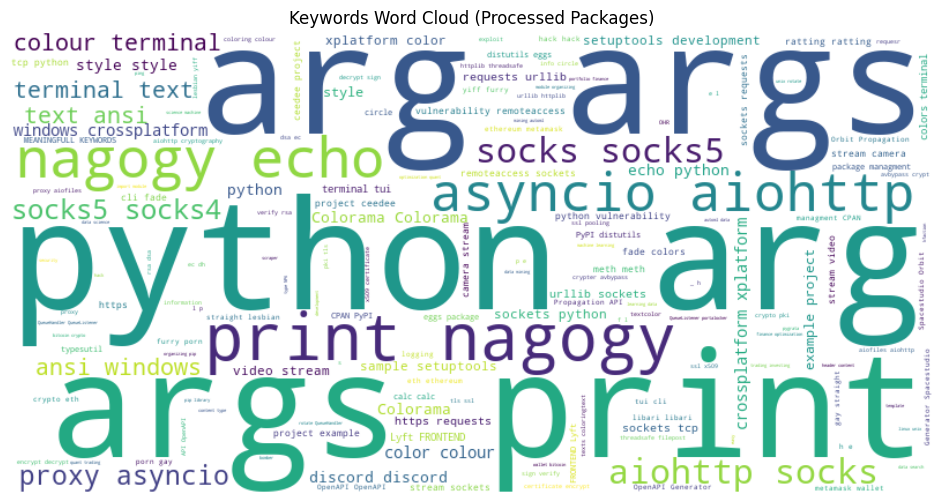

No keywords available for skipped packages.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the Excel file
file_path = 'MaliciousPackageMetadata.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Categorize the packages into skipped and processed
skipped_df = df[df['Reason for Skipping'].notnull()]
processed_df = df[df['Reason for Skipping'].isnull()]

# ------------------- Keyword Trends ------------------- #
# Analyze Keywords (Word Cloud)

# Processed Keywords
processed_keywords = ' '.join(processed_df['Keywords'].dropna())

# Skipped Keywords
skipped_keywords = ' '.join(skipped_df['Keywords'].dropna())

# Generate Word Cloud for Processed Keywords
if processed_keywords:
    wordcloud_processed = WordCloud(width=800, height=400, background_color='white').generate(processed_keywords)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_processed, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keywords Word Cloud (Processed Packages)')
    plt.show()
else:
    print("No keywords available for processed packages.")

# Generate Word Cloud for Skipped Keywords
if skipped_keywords:
    wordcloud_skipped = WordCloud(width=800, height=400, background_color='white').generate(skipped_keywords)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_skipped, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keywords Word Cloud (Skipped Packages)')
    plt.show()
else:
    print("No keywords available for skipped packages.")
